## My top 25 pandas tricks

01. 查看pandas版本信息（Show installed versions）
02. 建立一个Demo示例（Create an example DataFrame）
03. 列改名（Rename columns）
04. 按行倒序（Reverse row order）
05. 按列倒序（Reverse column order）
06. 按数据类型选择列（Select columns by data type）
07. 字符串转换为数字（Convert strings to numbers）
08. 减少DF大小（Reduce DataFrame size）***
09. 根据多个文件建立DF-行模式（Build a DataFrame from multiple files, row-wish）
10. 根据多个文件建立DF-列模式（Build a DataFrame from multiple files, column-wish）
11. 根据粘贴板建立一个DF（Create a DataFrame from the clipboard)
12. 生成随机的数据子集（Split a DataFrame into two random subsets）
13. 根据多个类别过滤数据（Filter a DataFrame by multiple categories）
14. 根据最大的类别过滤数据（Filter a DataFrame by largest categories）
15. 处理缺失数据（Handle missing values）
16. 把一个字符串分割成多列（Split a string into the multiple columns）
17. 根据Series里的列表，生成新DF（Expand a Series of lists into a DataFrame）
18. 数据汇总（aggregate by multiple functions）
19. 聚和函数的输出和应用（Combine the output of an aggregation with a DataFrame）
20. 选择一行或者一列的切片（Select a slice of rows and columns）

### 系统设置项

In [222]:
# 1. 设置float类型显示模式
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# or
pd.options.display.float_format = '{:.2f}'.format

### 标准引用库

In [54]:
import pandas as pd
import numpy as np

### 0. 数据准备

In [254]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

### 1. 查看pandas版本信息（Show installed versions）

In [55]:
### 1.1 查看pandas版本信息（Show installed versions）
pd.__version__

'0.25.1'

In [56]:
### 1.2 查看pandas版本信息（Show installed versions）
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 21.2.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : zh_CN.UTF-8
LOCALE           : zh_CN.UTF-8

pandas           : 0.25.1
numpy            : 1.19.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 21.3.1
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : 0.9.3
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotlib       : 3.1.1
numexpr         

### 2. 建立一个Demo示例（Create an example DataFrame）

In [57]:
# 2.1 建立一个Demo示例（Create an example DataFrame）
df = pd.DataFrame({'col one':[100,200], 'col two':[300,400]})
df

,col one,col two
0,100,300
1,200,400


In [58]:
# 2.2 建立一个Demo示例（Create an example DataFrame）
pd.DataFrame(np.random.rand(4,8))

,0,1,2,3,4,5,6,7
0,0.370974,0.593792,0.958850,0.237785,0.245746,0.726688,0.977789,0.201782
1,0.901462,0.066042,0.059746,0.841286,0.498883,0.321294,0.304790,0.083772
2,0.961276,0.755117,0.781461,0.939501,0.527181,0.237245,0.763978,0.570775
3,0.333543,0.452598,0.197152,0.407256,0.648278,0.556681,0.984065,0.824986


In [59]:
# 2.3 建立一个Demo示例（Create an example DataFrame）
pd.DataFrame(np.random.rand(4,8), columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.468215,0.625892,0.708247,0.117676,0.595691,0.055805,0.533817,0.341476
1,0.238457,0.177147,0.600919,0.320333,0.083921,0.180929,0.670262,0.239937
2,0.353706,0.013319,0.905749,0.223532,0.814140,0.099199,0.628318,0.213213
3,0.689192,0.325399,0.008172,0.714727,0.450476,0.977659,0.719786,0.413259


### 3. 列改名（Rename columns）

In [62]:
# 3.1 列改名（Rename columns）
df = df.rename({'col one':'col_one', 'col two':'col_two'},axis='columns')
df

,col_one,col_two
0,100,300
1,200,400


In [63]:
# 3.2 列改名（Rename columns）
df.columns = ['col-one', 'col-two']
df

,col-one,col-two
0,100,300
1,200,400


In [64]:
# 3.3 列改名（Rename columns）
df.columns = df.columns.str.replace('-','_')
df

,col_one,col_two
0,100,300
1,200,400


In [65]:
# 3.4 列改名（Rename columns）
df.add_prefix('X_')

,X_col_one,X_col_two
0,100,300
1,200,400


In [66]:
# 3.5 列改名（Rename columns）
df.add_suffix('_Y')

,col_one_Y,col_two_Y
0,100,300
1,200,400


### 4. 按行倒序（Reverse row order）

In [76]:
# 4.0 数据源（Data Source）
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [75]:
# 4.1 按行倒序（Reverse row order）
drinks.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,Africa
191,Zambia,32,19,4,2.5,Africa
190,Yemen,6,0,0,0.1,Asia
189,Vietnam,111,2,1,2.0,Asia
188,Venezuela,333,100,3,7.7,South America


In [79]:
# 4.2 倒序后重置索引，drop=True删除原索引
drinks.loc[::-1].reset_index(drop=True).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,Africa
1,Zambia,32,19,4,2.5,Africa
2,Yemen,6,0,0,0.1,Asia
3,Vietnam,111,2,1,2.0,Asia
4,Venezuela,333,100,3,7.7,South America


### 5. 按列倒序（Reverse column order）

In [83]:
# 5.0 数据源（Data Source）
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [84]:
# 5.1 按列倒序（Reverse column order）
drinks.loc[:,::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola


### 6. 按数据类型选择列（Select columns by data type）

In [86]:
# 6.0 查看DF数据类型
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [90]:
# 6.1 按数据类型选择列（Select columns by data type）
drinks.select_dtypes(include='number').head() # or 'int64', 'float64', 'object'...

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [91]:
# 6.2 按数据类型选择列（Select columns by data type）
drinks.select_dtypes(include=['float64','object']).head() # 列表

,country,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,Asia
1,Albania,4.9,Europe
2,Algeria,0.7,Africa
3,Andorra,12.4,Europe
4,Angola,5.9,Africa


In [94]:
# 6.3 按数据类型选择列（Select columns by data type）
drinks.select_dtypes(exclude='number').head() # exclude参数为: ’除此以外‘

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


### 7. 字符串转换为数字（Convert strings to numbers）

In [218]:
# 7.0 数据准备
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4', '5.5', '6.6'],
                   'col_three':['7.7','8.8','-'],
                   'col_four':['$1,234.21','$1,524,321.45','$8,934,987,574.66']})
df

,col_one,col_two,col_three,col_four
0,1.1,4.4,7.7,"$1,234.21"
1,2.2,5.5,8.8,"$1,524,321.45"
2,3.3,6.6,-,"$8,934,987,574.66"


In [202]:
# 7.0 查看数据类型
df.dtypes

col_one      object
col_two      object
col_three    object
col_four     object
dtype: object

In [203]:
# 7.1 字符串转换为数字（Convert strings to numbers）
df.astype({'col_one':'float', 'col_two':'float'}).dtypes

col_one      float64
col_two      float64
col_three     object
col_four      object
dtype: object

In [204]:
# 7.2 字符串转换为数字（Convert strings to numbers）
pd.to_numeric(df.col_three, errors='coerce') # errors参数可忽略错误

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

In [205]:
# 7.3 字符串转换为数字（Convert strings to numbers）
pd.to_numeric(df.col_three, errors='coerce').fillna(0) # errors转换为NaN的值以fillna()函数填入

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

In [200]:
# 7.4 字符串转换为数字（Convert strings to numbers）
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)
df

,col_one,col_two,col_three,col_four
0,1.1,4.4,7.7,0.0
1,2.2,5.5,8.8,0.0
2,3.3,6.6,0.0,0.0


In [223]:
# 7.5 带币种符号和千分位的数字，转换为float，（多列）

# 去除金额列中‘$’和',‘，并把类型转换为float
# replace()中运用了正则表达式
# astype()数据类型转换
df[df.columns[3:]] = df[df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
df

,col_one,col_two,col_three,col_four
0,1.1,4.4,7.7,1234.21
1,2.2,5.5,8.8,1524321.45
2,3.3,6.6,-,8934987574.66


In [224]:
# 7.6 带币种符号和千分位的数字，转换为float，（单列）
df['col_four'] = df['col_four'].replace('[\$,]', '', regex=True).astype(float)
df

,col_one,col_two,col_three,col_four
0,1.1,4.4,7.7,1234.21
1,2.2,5.5,8.8,1524321.45
2,3.3,6.6,-,8934987574.66


In [225]:
# 查看转换后的数据类型
df.dtypes

col_one       object
col_two       object
col_three     object
col_four     float64
dtype: object

### 8. 减少DF大小（Reduce DataFrame size）

In [ ]:
# 主要使用pd.info(memory_usage='deep')参数，配合read_csv()函数中usecols和dtype两个参数以完成减少默认DF内存占用的效果
# 由于仅适用于大型项目和数据处理，此处不做展开

### 9. 根据多个文件建立DF-行模式（Build a DataFrame from multiple files, row-wish）

In [ ]:
# 9.0 使用glob函数查找多个指定文件，输出至列表
from glob import glob
stock_files = sorted(glob('data/stock*.csv'))

# 9.1 使用pd.concat()批量导入多文件数据行
pd.concat( (pd.read_csv(file) for file in stock_files), ignore_index=True ) # ignore_index=True 重置索引编号

### 10. 根据多个文件建立DF-列模式（Build a DataFrame from multiple files, column-wish）

In [ ]:
# 10.0 使用glob函数查找多个指定文件，输出至列表
from glob import glob
stock_files = sorted(glob('data/stock*.csv'))

# 10.1 使用pd.concat()批量导入
pd.concat( (pd.read_csv(file) for file stock_files), axis='columns') # axis='columns' 按列合并

### 11. 根据粘贴板建立一个DF（Create a DataFrame from the clipboard)

In [109]:
# 11.0 从excel或Google sheets中直接进行数据拷贝

# 11.1 调用pd.read_clipborad()从粘贴板建立DF
df = pd.read_clipboard()
df

,Maltese,语种,English,语种.1,中文
0,barbier,fr,hairdresser,en,美发师
1,bennej,mt,builder,en,建造者
2,sajjied,mt,fisherman,en,渔夫
3,kennies,mt,sweeper,en,扫地机
4,bajjad,mt,painter,en,画家
5,furnar,mt,baker,en,贝克
6,kok,id,chef,fr,厨师
7,skarpan,is,shoemaker,en,鞋匠
8,surmast,et,headmaster,en,校长
9,mastrudaxxa,mt,carpenter,en,木匠


### 12. 生成随机的数据子集（Split a DataFrame into two random subsets）

In [127]:
# 12.1 使用sample()函数随机取样数据
movies.sample(frac=0.005) # frac 参数为取样比例

,star_rating,title,content_rating,genre,duration,actors_list
275,8.1,Groundhog Day,PG,Comedy,101,"[u'Bill Murray', u'Andie MacDowell', u'Chris E..."
138,8.3,Die Hard,R,Action,131,"[u'Bruce Willis', u'Alan Rickman', u'Bonnie Be..."
952,7.4,Pirate Radio,R,Comedy,117,"[u'Philip Seymour Hoffman', u'Bill Nighy', u'N..."
354,8.0,Kill Bill: Vol. 2,R,Action,137,"[u'Uma Thurman', u'David Carradine', u'Michael..."
233,8.1,The Night of the Hunter,APPROVED,Crime,92,"[u'Robert Mitchum', u'Shelley Winters', u'Lill..."


In [128]:
# 12.2 使用sample()函数随机取样数据
movies.sample(n=3) # n 参数为取样个数

,star_rating,title,content_rating,genre,duration,actors_list
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich..."
708,7.6,28 Days Later...,R,Horror,113,"[u'Cillian Murphy', u'Naomie Harris', u'Christ..."
491,7.8,The Magnificent Seven,NOT RATED,Action,128,"[u'Yul Brynner', u'Steve McQueen', u'Charles B..."


### 13. 根据多个类别过滤数据（Filter a DataFrame by multiple categories）

In [129]:
# 13.0 查看moviesDF中genre列唯一值
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [132]:
# 13.1 使用等式取得指定数据列表
movies[(movies.genre=='Crime')|(movies.genre=='Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [134]:
# 13.2 使用isin()函数取得上面语句相同效果
movies[movies.genre.isin(['Crime', 'Drama'])].head() # isin()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


In [135]:
# 13.3 使用’~‘非操作取得与上面语句效果相反的结果
movies[~movies.genre.isin(['Crime', 'Drama'])].head() # ~非操作

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


### 14. 根据最大的类别过滤数据（Filter a DataFrame by largest categories）

In [139]:
# 14.1 使用value_counts()按类别统计数据数量
counts = movies.genre.value_counts()
counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [142]:
# 14.2 取得出现次数最多的前几类数据
counts.nlargest(2) # 缺省是前5个

Drama     278
Comedy    156
Name: genre, dtype: int64

In [147]:
# 14.3 取得出现次数最多的类，以列表形式输出
counts.nlargest(2).index

Index(['Drama', 'Comedy'], dtype='object')

In [150]:
# 14.4 nlarges().index结合isin()函数输出指定类别数据
movies[movies.genre.isin(counts.nlargest(2).index)].head() # isin() and nlargest().index

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."


In [ ]:
### 15. 处理缺失数据（Handle missing values）

In [160]:
# 15.0 数据源
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [156]:
# 15.1 isna()判断缺失数据
ufo.isna().sum() # sum()统计

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [164]:
# 15.2 dropna()删除缺失数据行或列
ufo.dropna() # axis='columns'参数可删除缺失数据列

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,1939-06-30 20:00:00
19,Bering Sea,RED,OTHER,AK,1943-04-30 23:00:00
36,Portsmouth,RED,FORMATION,VA,1945-07-10 01:30:00
44,Blairsden,GREEN,SPHERE,CA,1946-06-30 19:00:00
82,San Jose,BLUE,CHEVRON,CA,1947-07-15 21:00:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,2000-12-28 19:10:00
18216,Garden Grove,ORANGE,LIGHT,CA,2000-12-29 16:10:00
18220,Shasta Lake,BLUE,DISK,CA,2000-12-29 20:30:00
18233,Anchorage,RED,VARIOUS,AK,2000-12-31 21:00:00


### 16. 把一个字符串分割成多列（Split a string into the multiple columns）

In [165]:
# 16.0 数据准备
df = pd.DataFrame({ 'name':['John Arthur Doe', 'Jane Ann Smith'],
                  'location':['Los Angeles, CA', 'Washington, DC']})
df

,name,location
0,John Arthur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


In [169]:
# 16.1 使用split()分割子串
df.name.str.split() # 缺省用空格分割

0    [John, Arthur, Doe]
1     [Jane, Ann, Smith]
Name: name, dtype: object

In [167]:
# 16.2 expand=True参数可以将拆分的子串转换为单独的列。
df.name.str.split(expand=True)

,0,1,2
0,John,Arthur,Doe
1,Jane,Ann,Smith


In [170]:
# 16.3 生成新的列
df[['first','middle','last']] = df.name.str.split(expand=True)
df

,name,location,first,middle,last
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


In [174]:
# 16.4 取其中一组数据生成新的列
df['city'] = df.location.str.split(', ', expand=True)[0]
df

,name,location,first,middle,last,city
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe,Los Angeles
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith,Washington


### 17. 根据Series里的列表，生成新DF

In [175]:
# 17.0 数据准备
df = pd.DataFrame({'col_one':['a','b','c'],
                  'col_two':[[10,40],[20,50],[30,60]]})
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


In [176]:
# 17.1 apply()函数生成新列
df_new = df.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


In [177]:
# 17.2 concat()函数按列连接表
pd.concat([df, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


### 18. 数据汇总

In [180]:
# 18.0 数据源
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [237]:
# 18.0 去除货币符号以及千分位，数据类型转换
orders['item_price'] = orders['item_price'].replace('[\$,]', '', regex=True).astype(float)

In [239]:
# 18.1 按指定列分类汇总groupby
orders.groupby('order_id').item_price.sum().head()

order_id
1   11.56
2   16.98
3   12.67
4   21.00
5   13.70
Name: item_price, dtype: float64

In [240]:
# 18.2 按指定列分类统计，多项汇总groupby and agg
orders.groupby('order_id').item_price.agg(['sum','count']).head() # agg可按多项统计要求进行统计

,sum,count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


### 19. 聚和函数的输出和应用（Combine the output of an aggregation with a DataFrame）

In [241]:
# 19.0 数据源
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [243]:
# 19.0 使用groupby() and sum()汇总数据减少2/3
len(orders.groupby('order_id').item_price.sum())

1834

In [244]:
# 19.0 这是总数据数量
len(orders.item_price)

4622

In [247]:
# 19.1 通过groupby() and transform()，取得与数据源相同行数的汇总数据
total_price = orders.groupby('order_id').item_price.transform('sum')
len(total_price)

4622

In [248]:
# 19.2 将取得的汇总数据作为新列导入
orders['total_price'] = total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
6,3,1,Side of Chips,NaN,1.69,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70


In [253]:
# 19.3 可以参与计算了
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,percent_of_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,0.21
1,1,1,Izze,[Clementine],3.39,11.56,0.29
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,0.29
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,0.21
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,1.00
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,0.87
6,3,1,Side of Chips,NaN,1.69,12.67,0.13
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,0.56
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,0.44
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,0.68


### 20. 选择一行或者一列的切片（Select a slice of rows and columns）

In [255]:
# 20.0 数据源
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [256]:
# 20.1 生成描述性统计数据
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [258]:
# 20.1 行切片
titanic.describe().loc['min':'max']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [260]:
# 20.2 列切片
titanic.describe().loc[:, 'Pclass':'Parch']

,Pclass,Age,SibSp,Parch
count,891.00,714.00,891.00,891.00
mean,2.31,29.70,0.52,0.38
std,0.84,14.53,1.10,0.81
min,1.00,0.42,0.00,0.00
25%,2.00,20.12,0.00,0.00
50%,3.00,28.00,0.00,0.00
75%,3.00,38.00,1.00,0.00
max,3.00,80.00,8.00,6.00


In [261]:
# 20.3 行和列同时切片
titanic.describe().loc['min':'max', 'Pclass':'Parch']

,Pclass,Age,SibSp,Parch
min,1.00,0.42,0.00,0.00
25%,2.00,20.12,0.00,0.00
50%,3.00,28.00,0.00,0.00
75%,3.00,38.00,1.00,0.00
max,3.00,80.00,8.00,6.00


In [ ]:
### 21. 

In [264]:
# 泰坦尼克号幸存率
titanic.Survived.mean()

0.3838383838383838

In [266]:
# 按性别统计幸存率
titanic.groupby('Sex').Survived.mean()

Sex
female   0.74
male     0.19
Name: Survived, dtype: float64

In [267]:
# 按性别和舱位等级进行叠加统计
titanic.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1        0.97
        2        0.92
        3        0.50
male    1        0.37
        2        0.16
        3        0.14
Name: Survived, dtype: float64

In [269]:
# 按性别和舱位等级进行叠加统计，用unstack()使数据可读性更强
titanic.groupby(['Sex','Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.97,0.92,0.50
male,0.37,0.16,0.14


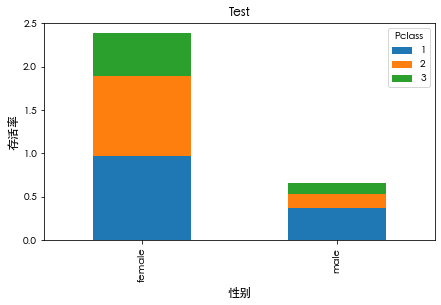

In [293]:
# 按性别和舱位等级进行叠加统计，用unstack()使数据可读性更强
import matplotlib.pyplot as plt

# 第一种方法，已试，可用
import matplotlib
# 使用字体
matplotlib.rcParams['font.family'] = ['Heiti TC']

fig, ax = plt.subplots(figsize=(7,4))
#titanic.groupby(['Sex','Pclass']).Survived.mean().unstack().plot(kind='bar', ax=ax)
titanic.groupby(['Sex','Pclass']).Survived.mean().unstack().plot.bar(stacked=True, title="Test", ax=ax)
ax.set_xlabel('性别', fontsize=12)
ax.set_ylabel('存活率', fontsize=12)
plt.show()